
# **Detecção de veículos e pedestres**

#### **Iremos aprender:**
1. Usar o classificador Haarcascade para detectar pedestres
2. Usar o classificador Haarcascade em vídeos
3. Usar o classificador Haarcascade para detectar carros


In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our videos and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq haarcascades.zip
!unzip -qq videos.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


#### **Testing on a Single Frame from our Video**

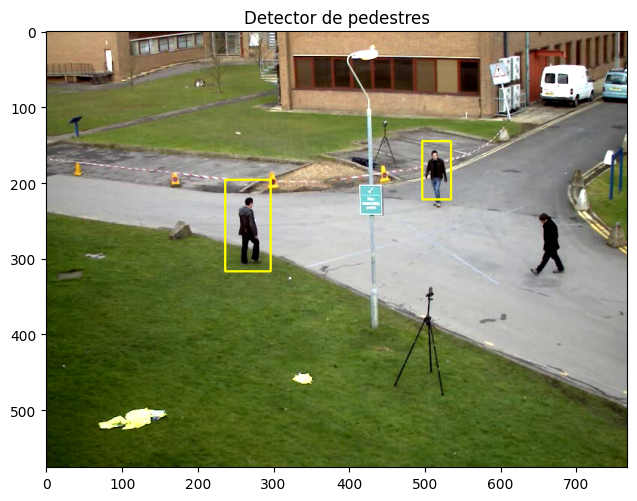

In [3]:
# criando o objeto do vídeo
cap = cv2.VideoCapture('images/walking.avi')

# carregando o classificador
body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

# pegando os frames
# variavel ret é a conexão com o vídeo/fonte
ret, frame = cap.read()

# conexão se mantiver
if ret: 

  #pegamos o frame e convertemos em grayscale
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # lançamos o frame cinza no classificador
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  # mostrando os objetos
  for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Liberar o objeto da memória
cap.release()   
imshow("Detector de pedestres", frame)

In [4]:
# criando o objeto do vídeo
cap = cv2.VideoCapture('images/walking.avi')

# carregando o classificador
body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

if not cap.isOpened():
    print("Cannot open camera")
    exit()

# enquanto o arquivo se mantiver aberto
while cap.isOpened(): 

    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Stream stopped.")
        break
    #pegamos o frame e convertemos em grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # lançamos o frame cinza no classificador
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

    # mostrando os objetos
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

    cv2.imshow("Detector de pedestres", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# Liberar o objeto da memória
cap.release()
cv2.destroyAllWindows()

Stream stopped.


#### **Testando nosso clipe de 15 segundos**

**NOTE**: Demora cerca de 1 minuto para ser executado.

Nós usamos a função cv2.VideoWriter para salvar o arquivo de saída como um AVI.

```cv2.VideoWriter(video_output.avi, cv2.VideoWriter.fourcc('M','J','P','G'), FPS, (width, height))```

Formats can be:
- 'M','J','P','G' or MJPG
- MP4V
- X264
- avc1
- XVID

**Função: cv2.VideoWriter.fourcc()**

É para especificar o codec de vídeo a ser usado ao gravar um vídeo. O "FourCC" (Four Character Code) é um código de quatro caracteres que identifica o formato de compressão de vídeo.

Sintaxe: cv2.VideoWriter_fourcc(c1, c2, c3, c4)

Exemplos:
- Codec: XVID (popular para arquivos AVI).(cv2.VideoWriter_fourcc(*'XVID'))
- Codec: Motion JPEG.(cv2.VideoWriter_fourcc(*'MJPG'))
- Codec: DivX. (cv2.VideoWriter_fourcc(*'DIVX'))
- Codec: MPEG-4. (cv2.VideoWriter_fourcc(*'MP4V'))
- Codec: H.264 (popular para alta compressão e qualidade). (cv2.VideoWriter_fourcc(*'H264'))
    Necessita suporte adicional no sistema.





In [5]:

cap = cv2.VideoCapture('images/walking.avi')

print(cap.get(3))
print(cap.get(4))

# Obtenha a altura e largura do quadro (necessário para ser uma interferência)
w = int(cap.get(3))
h = int(cap.get(4))

# Criando o vídeo, passando o nome de saida, o codec, FPS, dimensões
out = cv2.VideoWriter('walking_outputHaar.avi', cv2.VideoWriter.fourcc('M','J','P','G'), 30, (w, h))


body_detector = cv2.CascadeClassifier('haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    bodies = body_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Escrevendo o frame no arquivo de saída
    out.write(frame)
  else:
      break

cap.release()
out.release()

768.0
576.0


## **Play Video within Colab**
Steps
1. Convert the AVI file to MP4 using FFMPEG
2. Load the HTML plugins in IPython
3. Display our HTML video player

In [6]:
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

FileNotFoundError: [Errno 2] No such file or directory: 'walking_output.mp4'

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#### **Detectar veículos (somente o primeiro frame)**

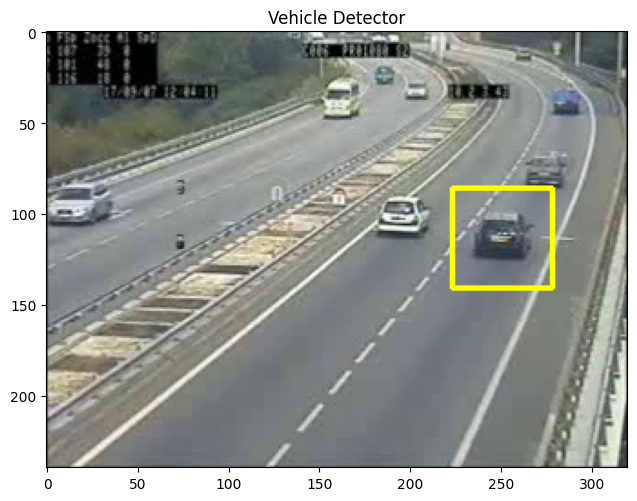

In [10]:
# Create our video capturing object
cap = cv2.VideoCapture('images/cars.avi')

# Load our vehicle classifier
vehicle_detector = cv2.CascadeClassifier('haarcascade_car.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  vehicles = vehicle_detector.detectMultiScale(gray, 1.4, 2)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in vehicles:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Release our video capture
cap.release()   
imshow("Vehicle Detector", frame)

#### **Testando com vídeo.**

In [15]:
# Create our video capturing object
cap = cv2.VideoCapture('images/RodoviaCoreia.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('Rodovia-Coreia-Out.mp4', cv2.VideoWriter.fourcc('M','P','4','V'), 30, (w, h))

vehicle_detector = cv2.CascadeClassifier('haarcascade_car.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    vehicles = vehicle_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in vehicles:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Write the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()

In [ ]:
!ffmpeg -i /content/cars_output.avi cars_output.mp4 -y

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('cars_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)